In [ ]:
!pip install easyocr
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

In [3]:
# Upload Image (For Colab)
from google.colab import files
uploaded = files.upload()

# Load uploaded image
for fn in uploaded.keys():
    img = cv2.imread(fn)
    break  # Only take first uploaded file

Saving cars.jpg to cars.jpg


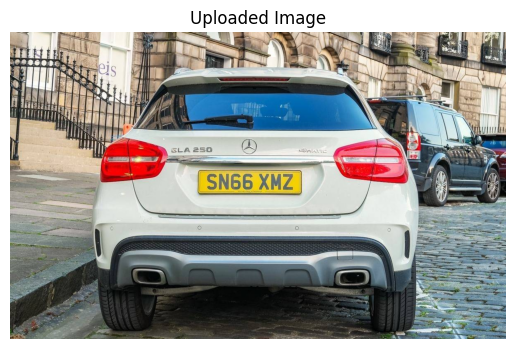

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

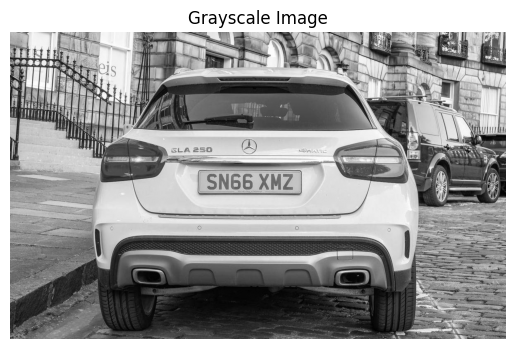

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

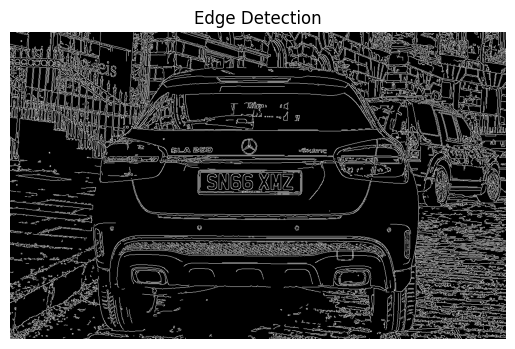

In [6]:
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.show()

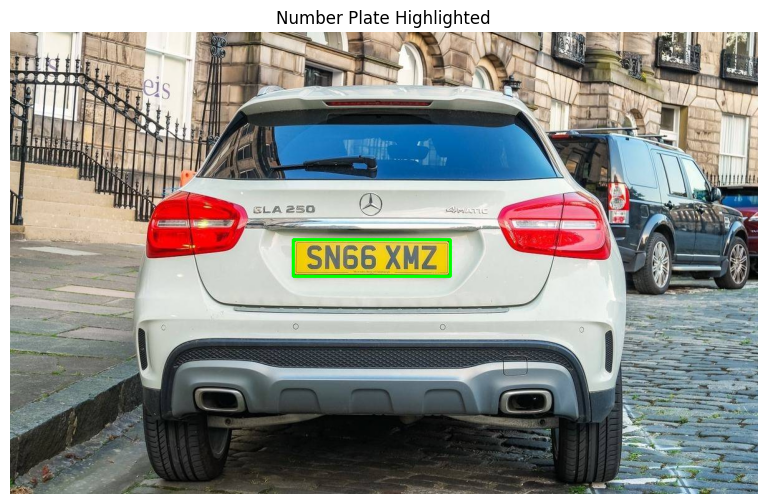

In [7]:
# Load the image
img = cv2.imread('cars.jpg')  # Change path if needed
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 1: Convert to HSV (good for color detection)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Step 2: Define yellow color range (tuned for UK yellow plates)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Step 3: Create mask for yellow regions
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Step 4: Bitwise-AND mask with original image
result = cv2.bitwise_and(img, img, mask=mask)

# Step 5: Find contours on the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_yellow_plate = img_rgb.copy()

# Step 6: Filter and draw rectangle (likely the plate)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = w / float(h)
    area = w * h

    if 2 < aspect_ratio < 6 and 5000 < area < 50000:
        cv2.rectangle(img_with_yellow_plate, (x, y), (x + w, y + h), (0, 255, 0), 3)
        break  # Found the plate, stop

# Show detected yellow plate
plt.figure(figsize=(10,6))
plt.imshow(img_with_yellow_plate)
plt.title('Number Plate Highlighted')
plt.axis('off')
plt.show()

In [8]:
!pip install opencv-python pytesseract matplotlib numpy
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


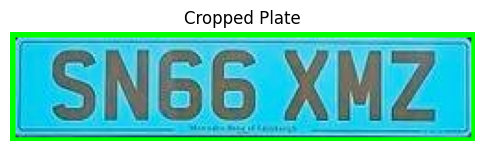

In [10]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# Assuming 'img_with_yellow_plate' contains the image with the highlighted plate
# Get the coordinates of the bounding box (you might need to adjust these based on your output)
x, y, w, h = cv2.boundingRect(c) # 'c' should be the contour of the plate from the previous cell

# Crop the plate region
plate_img = img_with_yellow_plate[y:y+h, x:x+w]

plt.figure(figsize=(6,3))
plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Plate')
plt.axis('off')
plt.show()

In [11]:
plate_rgb = cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB)
custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
extracted_text = pytesseract.image_to_string(plate_rgb, config=custom_config).strip()

print(f"Detected Number Plate Text:{extracted_text}")

Detected Number Plate Text:SN66XMZ
